Data after preprocessing
Names: Richard Perez, Travis Counihan, David Nguyen

In [ ]:
from google.colab import drive
import os

In [ ]:
# Mounting Google Drive so data file can be accessed
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
import pandas as pd # Import pandas to handle data processing

# Read the data file
file = "BitcoinHeistData.csv"
df = pd.read_csv(file)

In [ ]:
# data cleaning but it looks mostly clean
df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


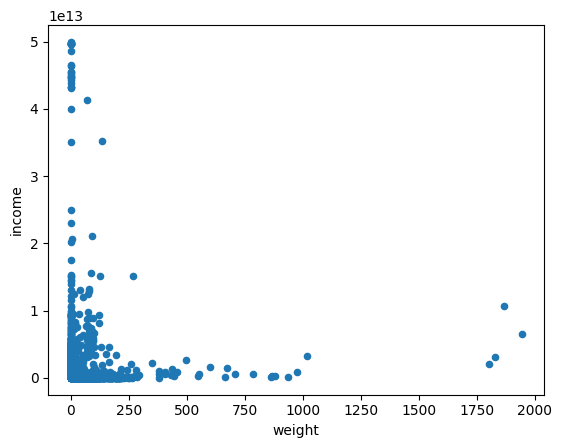

In [ ]:
# visualization techniques, reference chapter 1
# scatter plot of weight and income
import matplotlib.pyplot as plt

weightAndInc = df.plot(kind='scatter', x='weight',y='income')
plt.show()
# interesting outliers

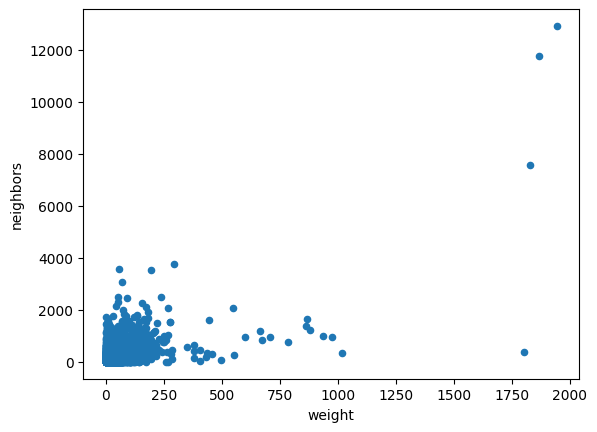

In [ ]:
weightAndNeighbors = df.plot(kind='scatter', x='weight',y='neighbors')
plt.show()

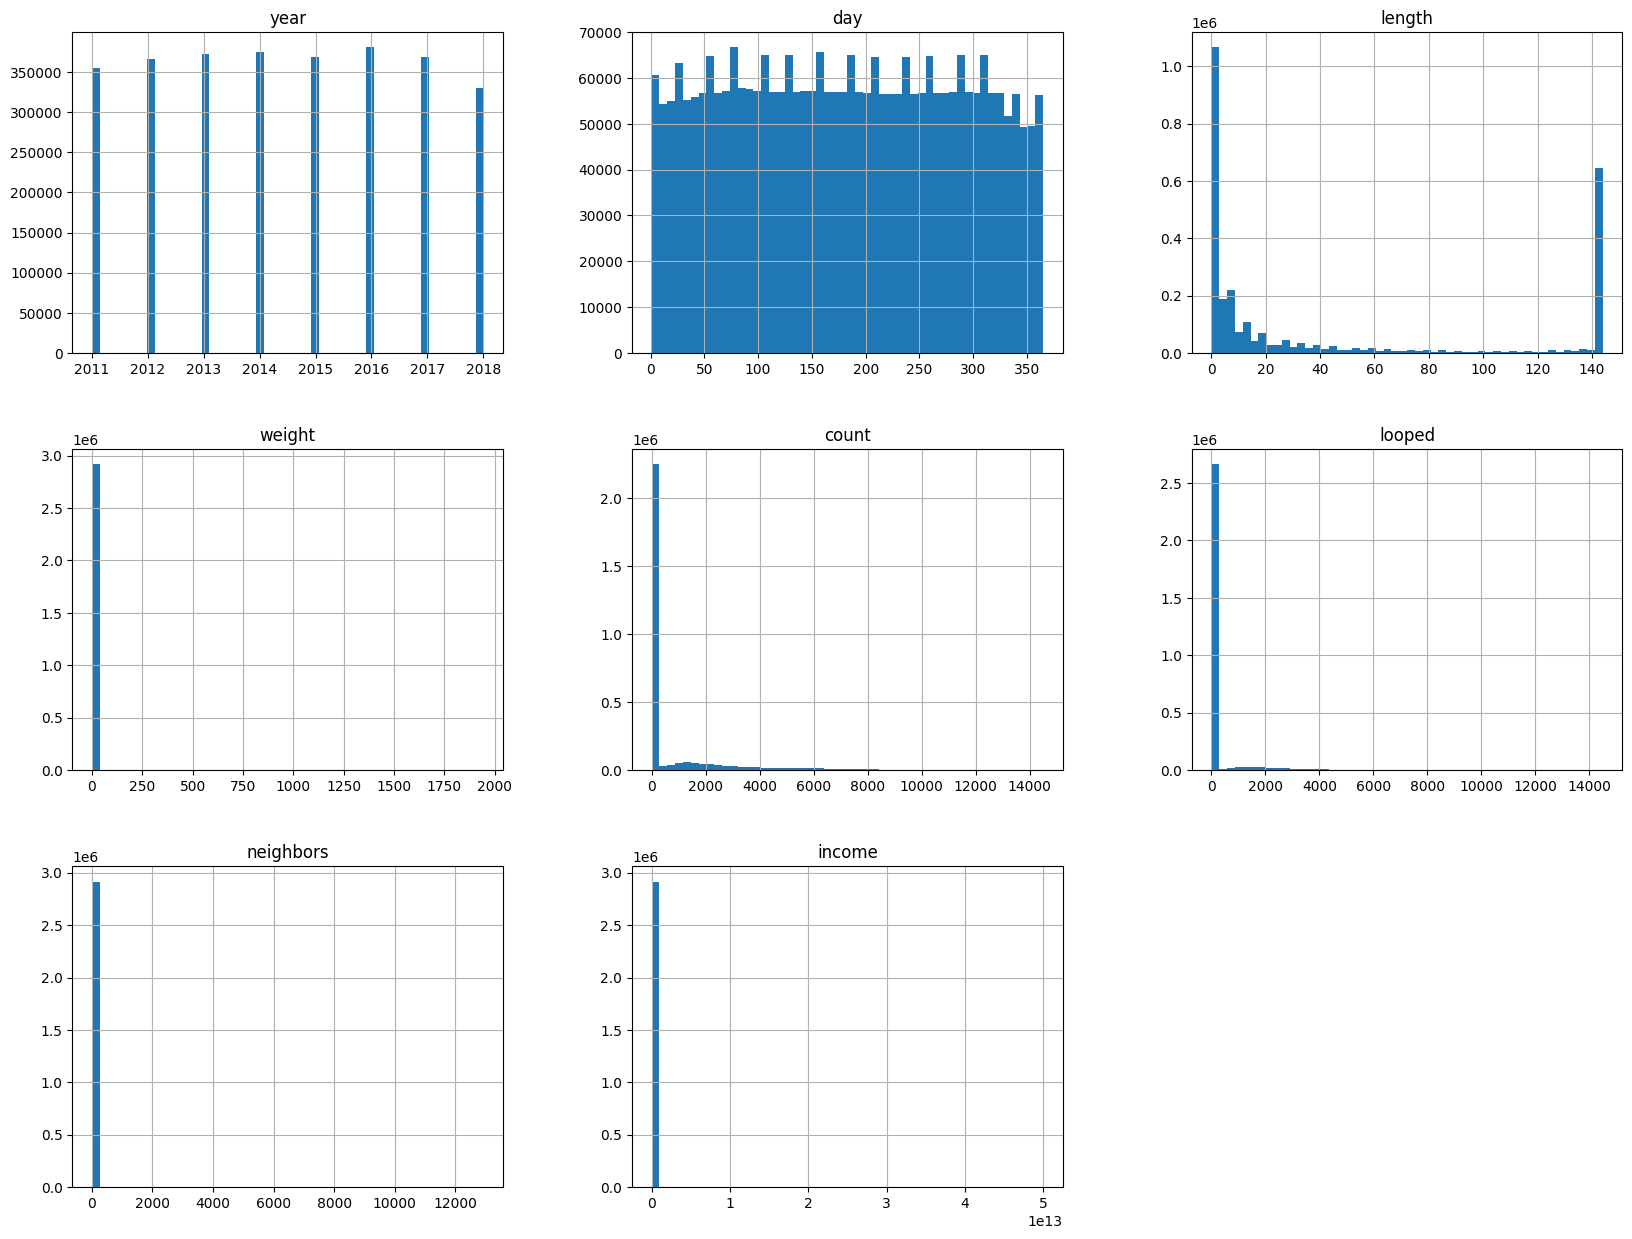

In [ ]:
#histogram referencing chapter 2
df.hist(bins=50, figsize=(20,15))
plt.show()
# 2011 and 2016 spiked in activity

,weight,income,length,count,neighbors,looped
count,"2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00"
mean,0.55,"4,464,889,007.19",45.01,721.64,2.21,238.51
std,3.67,"162,685,960,669.52",58.98,"1,689.68",17.92,966.32
min,0.00,"30,000,000.00",0.00,1.00,1.00,0.00
25%,0.02,"74,285,590.00",2.00,1.00,1.00,0.00
50%,0.25,"199,998,518.00",8.00,1.00,2.00,0.00
75%,0.88,"994,000,000.00",108.00,56.00,2.00,0.00
max,"1,943.75","49,964,398,238,996.00",144.00,"14,497.00","12,920.00","14,496.00"


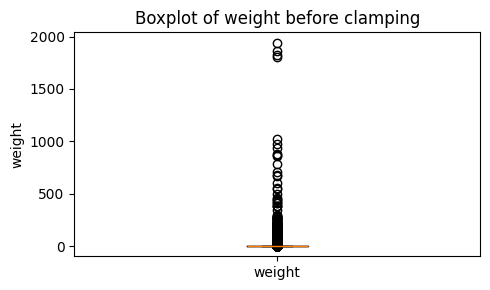

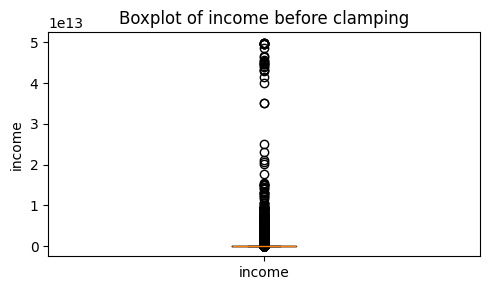

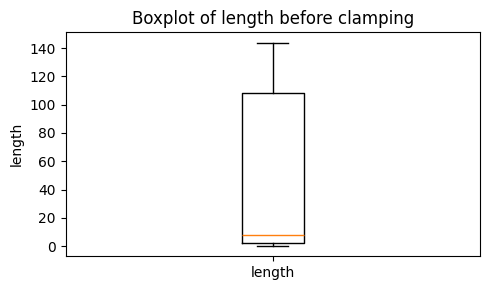

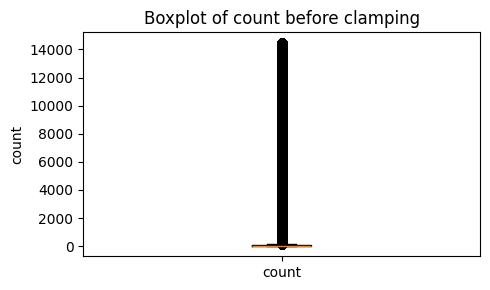

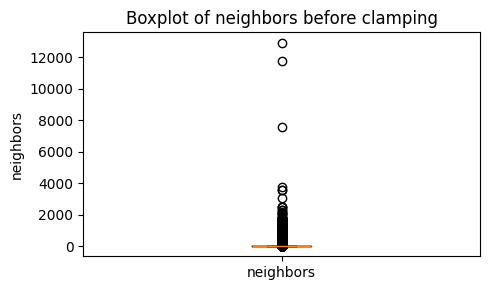

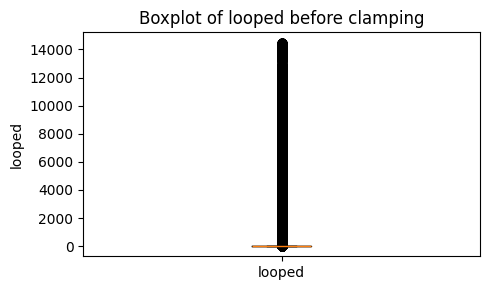

In [ ]:
#lots of outliers so doing a clamp transformation
import numpy as np

# Save copy of data before clamping
df_before = df.copy()

nums = ["weight", "income", "length", "count", "neighbors", "looped"]

# Show the data metrics before clamping
before_clamp = (df[nums]
                .describe()
                .style
                .format("{:,.2f}")
                .set_caption("Before Clamping")
              )
display(before_clamp)

# Boxplot of data before clamping
for col in nums:
    plt.figure(figsize=(5,3))
    plt.boxplot(df_before[col])
    plt.title(f"Boxplot of {col} before clamping")
    plt.ylabel(col)
    plt.xticks([1], [col])
    plt.tight_layout()
    plt.show()


,weight,income,length,count,neighbors,looped
count,"2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00","2,916,697.00"
mean,0.48,"2,805,100,357.31",45.01,592.17,1.94,153.30
std,0.74,"16,765,758,550.04",58.98,"1,233.22",2.00,517.67
min,0.00,"30,000,000.00",0.00,1.00,1.00,0.00
25%,0.02,"74,285,590.00",2.00,1.00,1.00,0.00
50%,0.25,"199,998,518.00",8.00,1.00,2.00,0.00
75%,0.88,"994,000,000.00",108.00,56.00,2.00,0.00
max,7.89,"329,836,810,346.24",144.00,"4,101.00",38.04,"2,171.15"


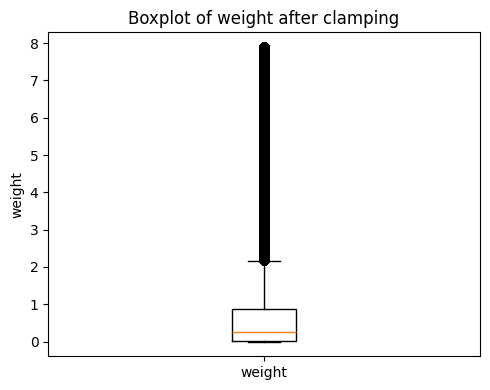

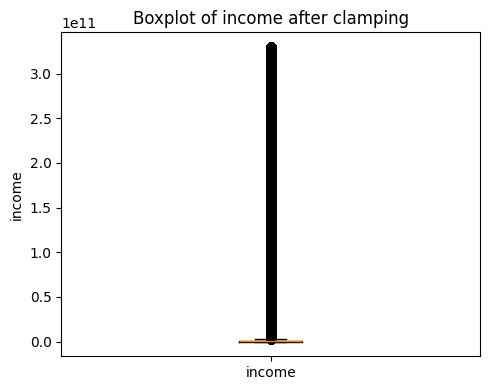

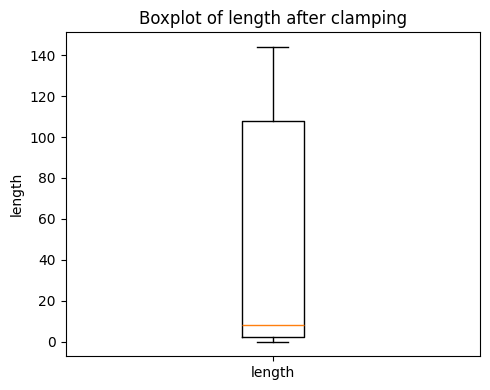

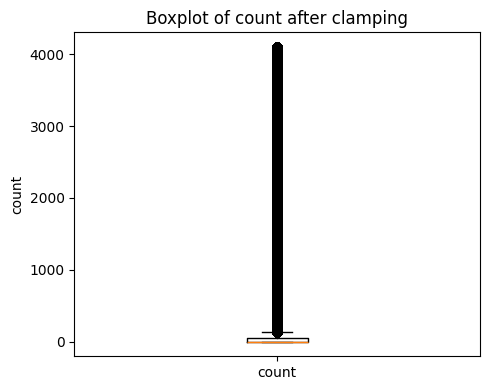

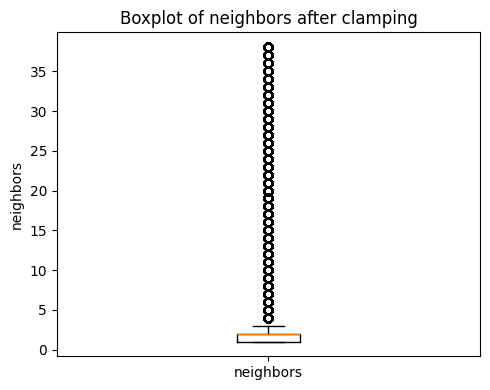

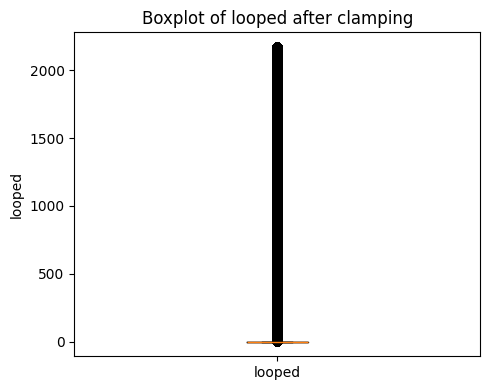

In [ ]:
# 2 standard dev of mean
for col in nums:
  mean = df[col].mean()
  std = df[col].std()
  low = mean - 2 * std
  upp = mean + 2 * std
  df[col] = np.clip(df[col], low, upp)

# Show how data changed after clamping
after_clamp = (df[nums]
               .describe()
               .style.format("{:,.2f}")
               .set_caption("After Clamping")
            )
display(after_clamp)

# Save copy of data before clamping
df_after = df.copy()

# Boxplot of data before clamping
for col in nums:
    plt.figure(figsize=(5,4))
    plt.boxplot(df_after[col])
    plt.title(f"Boxplot of {col} after clamping")
    plt.ylabel(col)
    plt.xticks([1], [col])
    plt.tight_layout()
    plt.show()

- Box plots are very condensed
- Need to log scale the data so we can visually see what's going on with the data

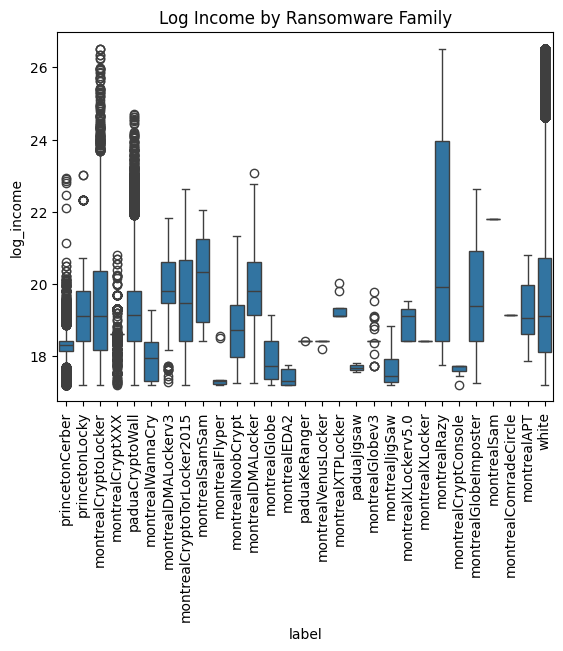

In [ ]:
import numpy as np # Import Numpy
import seaborn as sns # Import Seaborn for visualizations
import matplotlib.pyplot as plt # Import matplotlib plyplot for plotting

# Trying to make more visually usable plot by log scaling the data
df['log_income'] = np.log1p(df['income'])
sns.boxplot(x='label', y='log_income', data=df)
plt.title('Log Income by Ransomware Family')
plt.xticks(rotation=90)
plt.show()

- Now that data is log scaled, it is much clearer to see the right skewness of the white label that the data source page was talking about
- There are also a few other right skewed labels such as princetonCerber, montreolCryptoLocker, and paduaCryptoWall

In [ ]:
# Compute Pearson correlation matrix
pearson_corr = df[nums].corr(method='pearson')
print(pearson_corr)

             weight    income    length     count  neighbors    looped
weight     1.000000  0.086474 -0.108733 -0.027360   0.472989  0.022105
income     0.086474  1.000000 -0.001751 -0.027596   0.157346 -0.005890
length    -0.108733 -0.001751  1.000000  0.790236   0.136237  0.493136
count     -0.027360 -0.027596  0.790236  1.000000   0.113323  0.541214
neighbors  0.472989  0.157346  0.136237  0.113323   1.000000  0.202889
looped     0.022105 -0.005890  0.493136  0.541214   0.202889  1.000000


- There does not appear to be a strong correlation between any two features
- This could be due to the fact that the data is incredibly dense, as there are visual correlations, but calculated correlations may not show up as well
- This is probably due to the right skewness the data source page was talking about

array([[<Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='income', ylabel='weight'>,
        <Axes: xlabel='length', ylabel='weight'>,
        <Axes: xlabel='count', ylabel='weight'>,
        <Axes: xlabel='neighbors', ylabel='weight'>,
        <Axes: xlabel='looped', ylabel='weight'>],
       [<Axes: xlabel='weight', ylabel='income'>,
        <Axes: xlabel='income', ylabel='income'>,
        <Axes: xlabel='length', ylabel='income'>,
        <Axes: xlabel='count', ylabel='income'>,
        <Axes: xlabel='neighbors', ylabel='income'>,
        <Axes: xlabel='looped', ylabel='income'>],
       [<Axes: xlabel='weight', ylabel='length'>,
        <Axes: xlabel='income', ylabel='length'>,
        <Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='count', ylabel='length'>,
        <Axes: xlabel='neighbors', ylabel='length'>,
        <Axes: xlabel='looped', ylabel='length'>],
       [<Axes: xlabel='weight', ylabel='count'>,
        <Axes: xlabel='income', ylabel='co

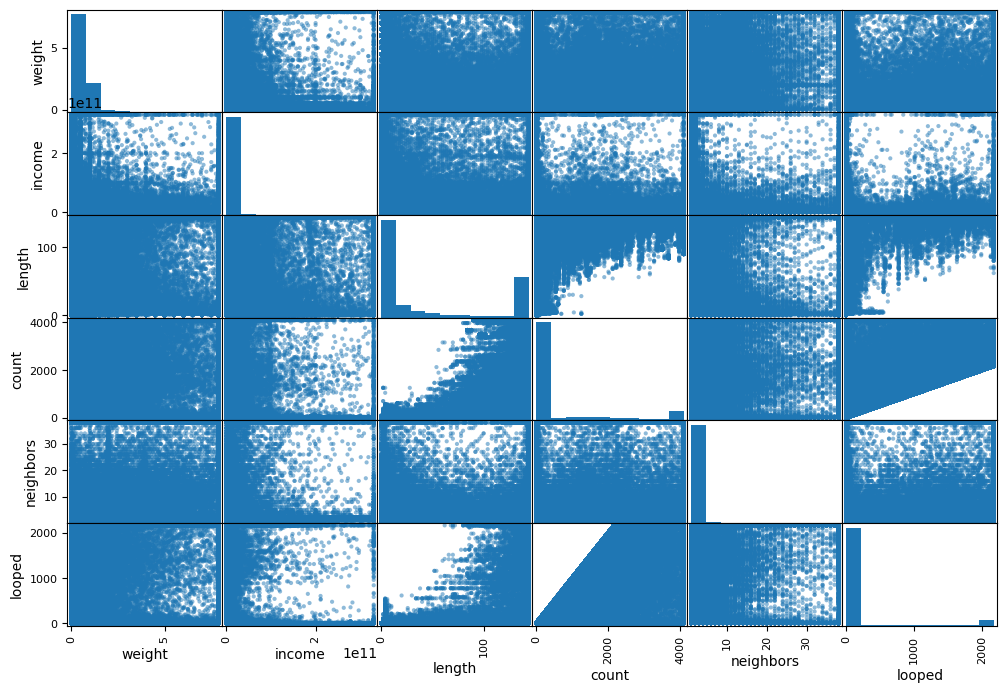

In [ ]:
from pandas.plotting import scatter_matrix
correlations = df.corr(numeric_only= True)
attributes = ["weight", "income", "length", "count", "neighbors", "looped"]
scatter_matrix(df[attributes], figsize=(12,8))


- SPLOM is good but dense
- The diagonal shows the outliers clearly for length (determined by the second non-prominant peak to the right)
  - Might try to remove these outliers
- In an effort to better visualize the SPLOM, logging the axes might be necessary
------------------------------------------------------------------
- After a very long time of computing the log scaled graphs, there were no trends revealed from logging the data

In [ ]:
# Split into Train Set and Test Set
from sklearn.model_selection import train_test_split

Y = df['label'] # Y is the target feature
class_count = Y.value_counts()    # Can't stratify if class label has < 2 counts
class_remove = class_count[class_count < 2].index   # Identify the classes with count < 2
df_newclass = df[~df['label'].isin(class_remove)]   # Remove the classes with count < 2 from dataset

X = df_newclass.drop('label', axis=1) # Drop the label column which is our target feature
Y_new = df_newclass['label']          # Y_new is the new target feature

X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X, Y_new, test_size=0.2, stratify=Y_new, random_state=42    # 80% of data split to Train Set and 20% to Test Set, Stratify to ensure class proportions in both sets, Random state to make sure split is reproducible
)

# Move target feature to the last column (Creating log_income column caused target feature to not be on the far right)
every_column = list(df_newclass.columns)     # Get every column names
every_column.remove('label')                 # Remove the label column from its current position
every_column.append('label')                 # Append label column to the end of the list
df_newclass = df_newclass[every_column]      # Reorder the dataframe

# Save preprocessed data to a separate CSV
df_newclass.to_csv("BitcoinHeistDataPREPROCESSED.csv", index=False)